# Imports

In [1]:
# importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Fetching

In [2]:
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
seller_type1 = df.pivot_table(index = ['seller_type'], aggfunc = 'size')
print(seller_type1)

seller_type
Dealer              1126
Individual          6766
Trustmark Dealer     236
dtype: int64


In [5]:
transmission_type1 = df.pivot_table(index = ['transmission'], aggfunc = 'size')
print(transmission_type1)

transmission
Automatic    1050
Manual       7078
dtype: int64


In [6]:
df1 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
seller_type2 = df1.pivot_table(index = ['seller_type'], aggfunc = 'size')
print(seller_type2)

seller_type
Dealer               994
Individual          3244
Trustmark Dealer     102
dtype: int64


In [8]:
transmission_type2 = df1.pivot_table(index = ['transmission'], aggfunc = 'size')
print(transmission_type2)

transmission
Automatic     448
Manual       3892
dtype: int64


In [9]:
owner_type2 = df1.pivot_table(index = ['owner'], aggfunc = 'size')
print(owner_type2)

owner
First Owner             2832
Fourth & Above Owner      81
Second Owner            1106
Test Drive Car            17
Third Owner              304
dtype: int64


In [10]:
df2 = pd.read_csv('car data.csv')
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis (EDA)

## Analysing the Datasets

In [11]:
# Shape of the datasets
print('DF1 Shape: ', df.shape)
print('DF2 Shape: ', df1.shape)
print('DF3 Shape: ', df2.shape)

DF1 Shape:  (8128, 13)
DF2 Shape:  (4340, 8)
DF3 Shape:  (301, 9)


In [12]:
# checking the info of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas

In [13]:
# getting a statistical summary of the datasets
d1 = df.describe()
d2 = df1.describe()
d3 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


'<<< DATASET 2 >>>'

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


'<<< DATASET 3 >>>'

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Analysis of vehicles sold each year

### For Dataset 1

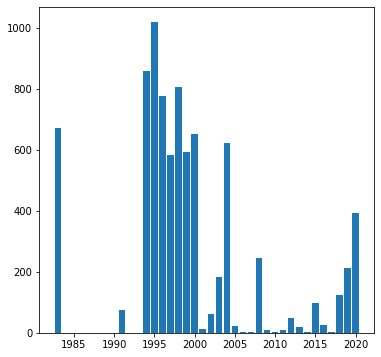

In [14]:
# Get count of vehicles sold each year
data1 = df.pivot_table(index = ['year'], aggfunc ='size')
np.array(data1)
df_year = df['year'].drop_duplicates()
np.array(df_year)
np.sort(df_year)
plt.figure(figsize=(6, 6))
plt.bar(df_year, data1)
plt.show()

### For Dataset 2

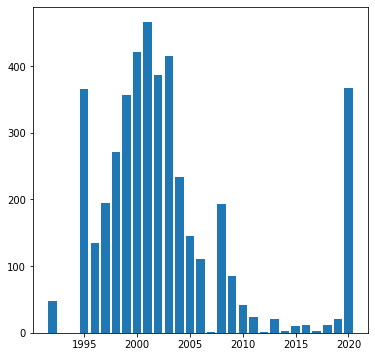

In [15]:
# Get count of vehicles sold each year
data2 = df1.pivot_table(index = ['year'], aggfunc ='size')
np.array(data2)
df_year1 = df1['year'].drop_duplicates()
np.array(df_year1)
np.sort(df_year1)
plt.figure(figsize=(6, 6))
plt.bar(df_year1, data2)
plt.show()

### For Dataset 3

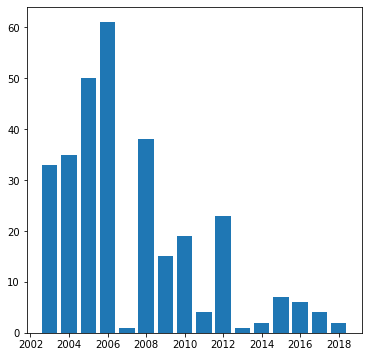

In [16]:
# Get count of vehicles sold each year
data3 = df2.pivot_table(index = ['Year'], aggfunc ='size')
np.array(data3)
df_year2 = df2['Year'].drop_duplicates()
np.array(df_year2)
np.sort(df_year2)
plt.figure(figsize=(6, 6))
plt.bar(df_year2, data3)
plt.show()

# Analysing types of fuel

### For Dataset 1

fuel
CNG         57
Diesel    4402
LPG         38
Petrol    3631
dtype: int64


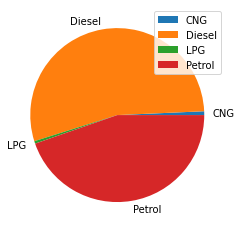

In [17]:
# For data 1
fuel_type1 = df.pivot_table(index = ['fuel'], aggfunc = 'size')
print(fuel_type1)
fuel = ["CNG", "Diesel", "LPG", "Petrol"]
plt.pie(fuel_type1, labels = fuel)
plt.legend()
plt.show()

### For Dataset 2

fuel
CNG           40
Diesel      2153
Electric       1
LPG           23
Petrol      2123
dtype: int64


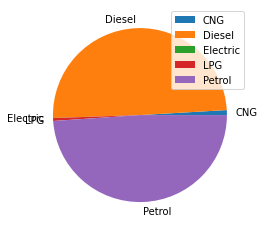

In [18]:
# For data 2
fuel_type2 = df1.pivot_table(index = ['fuel'], aggfunc = 'size')
print(fuel_type2)
mylabel = ["CNG", "Diesel", "Electric", "LPG", "Petrol"]
plt.pie(fuel_type2, labels = mylabel)
plt.legend()
plt.show()

### For Dataset 3

Fuel_Type
CNG         2
Diesel     60
Petrol    239
dtype: int64


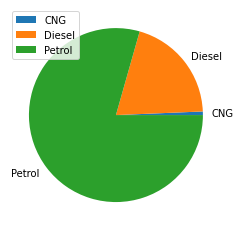

In [19]:
# For data 3
fuel_type3 = df2.pivot_table(index = ['Fuel_Type'], aggfunc = 'size')
print(fuel_type3)
mylabel = ["CNG", "Diesel","Petrol"]
plt.pie(fuel_type3, labels = mylabel)
plt.legend()
plt.show()

## Analysing number of vehicles sold for each company

### For Dataset 1

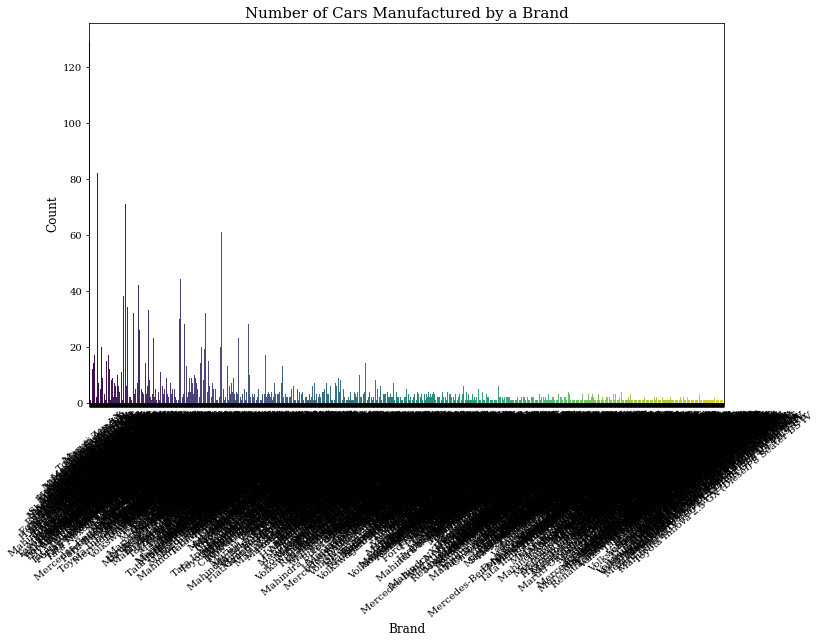

In [20]:
# brand-wise count of Vehicles
sns.catplot(data=df, x='name', kind='count', palette='viridis',height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of Cars Manufactured by a Brand', family='serif', size=15)
plt.show()

### For Dataset 2

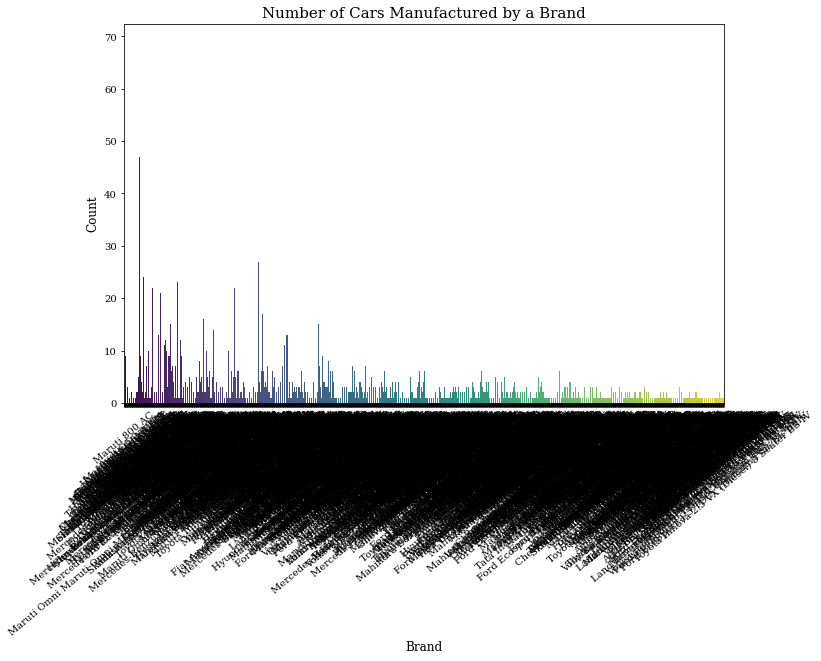

In [21]:
# brand-wise count of EV models
sns.catplot(data=df1, x='name', kind='count', palette='viridis',height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of Cars Manufactured by a Brand', family='serif', size=15)
plt.show()

### For Dataset 3

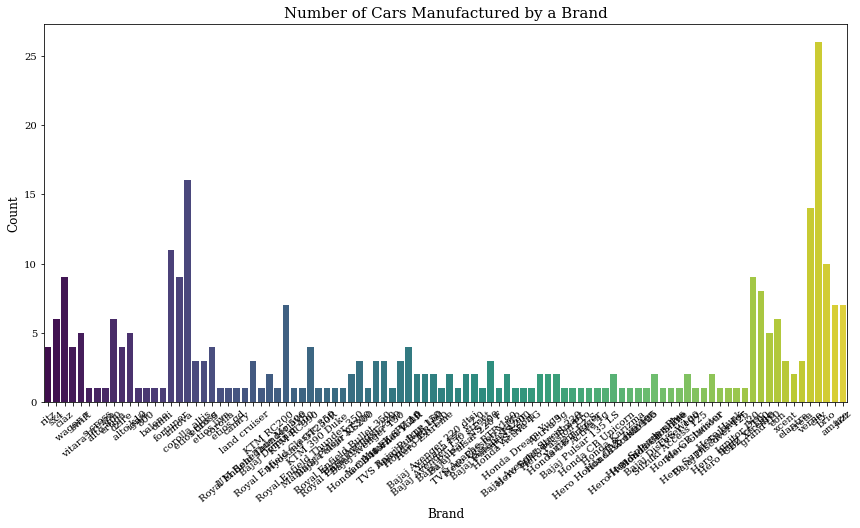

In [22]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Car_Name', kind='count', palette='viridis',height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of Cars Manufactured by a Brand', family='serif', size=15)
plt.show()

## Analysis of Vehicles of different number of seats

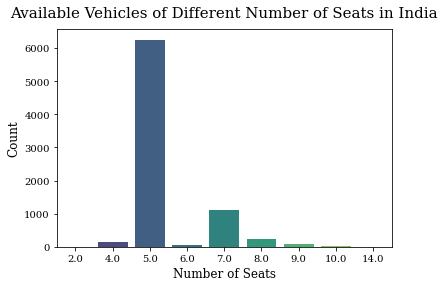

In [23]:
# Vehicles of different number of seats from dataset 1
sns.countplot(data=df, x='seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

## Price Comparision

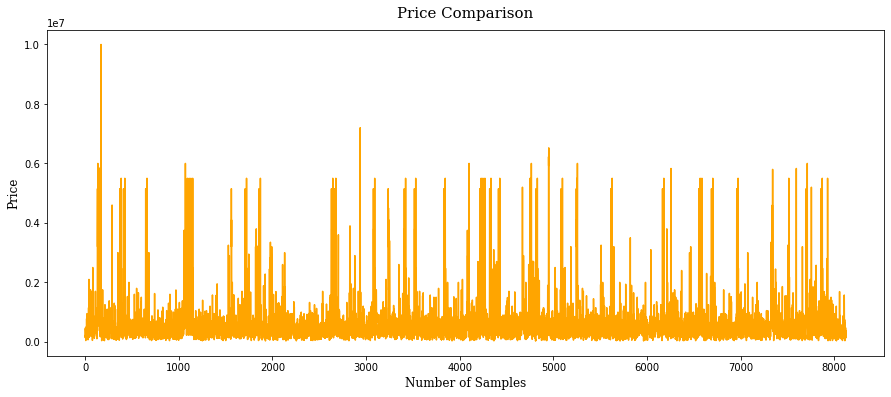

In [24]:
# plotting the price from dataset 1
plt.figure(figsize=(15,6))
plt.plot(df['selling_price'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

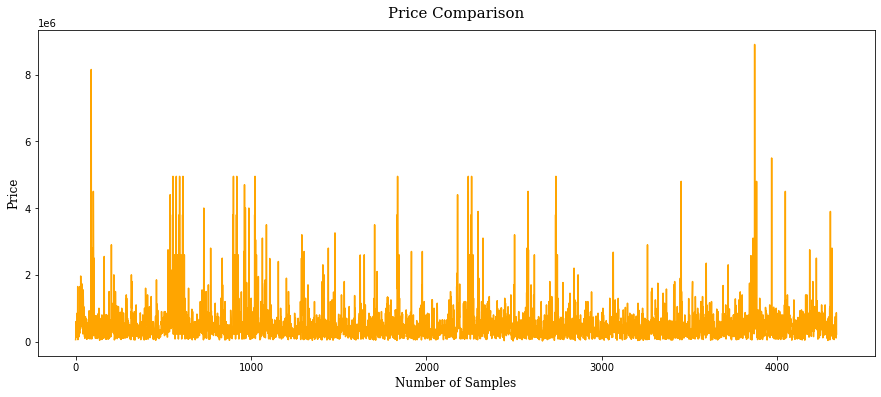

In [25]:
# plotting the price from dataset 2
plt.figure(figsize=(15,6))
plt.plot(df1['selling_price'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

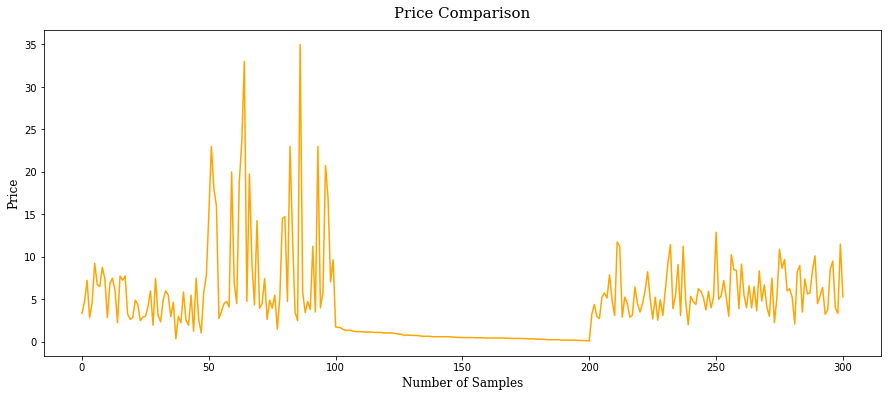

In [26]:
# plotting the price from dataset 1
plt.figure(figsize=(15,6))
plt.plot(df2['Selling_Price'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

## Mileage Analysis

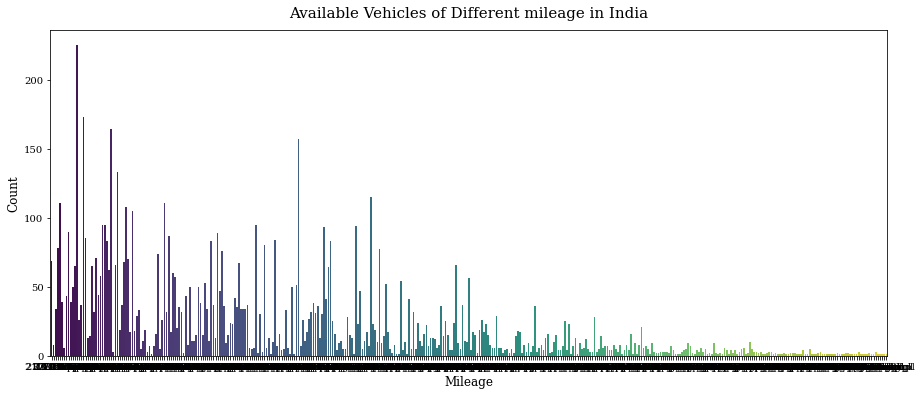

In [27]:
# Using Dataset 1
plt.figure(figsize = (15, 6))
sns.countplot(data=df, x='mileage', palette='viridis')
plt.xlabel('Mileage', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Vehicles of Different mileage in India', family='serif', size=15, pad=12)
plt.show()

## Maximum Power Analysis

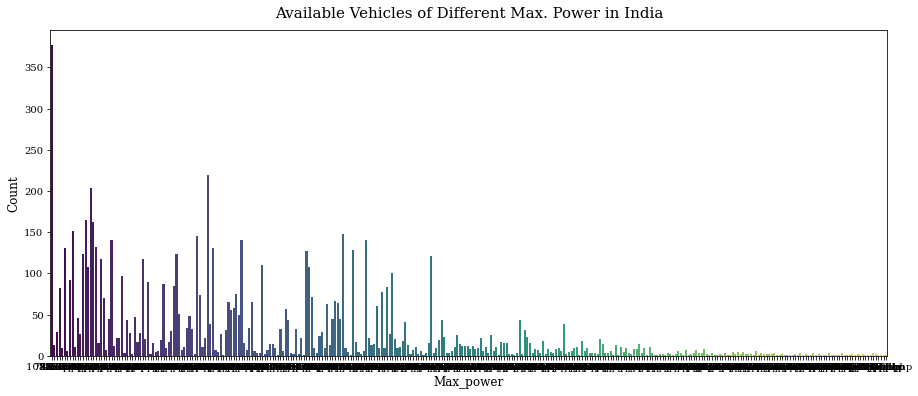

In [28]:
plt.figure(figsize = (15, 6))
sns.countplot(data=df, x='max_power', palette='viridis')
plt.xlabel('Max_power', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Vehicles of Different Max. Power in India', family='serif', size=15, pad=12)
plt.show()

## Model Building Using K-Means Clusteing

In [29]:
# encoding the categorical features

# fuel feature
df1['fuel'].replace(to_replace=["CNG", "Diesel", "Electric", "LPG", "Petrol"],value=[0, 1, 2, 3, 4],inplace=True)

# seller_type feature
df1['seller_type'].replace(to_replace=["Dealer", "Individual", "Trustmark Dealer"],value=[0, 1, 2],inplace=True)

# transmission feature
df1['transmission'].replace(to_replace=["Automatic", "Manual"],value=[0, 1],inplace=True)

In [30]:
# selecting features for building a model
X = df1[['selling_price','km_driven','fuel','seller_type', 'transmission']]

In [31]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.070993,-0.714695,0.218515,0.482947,0.058395
1,-0.880288,-0.985358,0.299896,0.195559,0.015251
2,-0.236903,1.269989,0.229981,-0.295331,0.088585
3,-0.729725,-1.018708,0.359246,0.109471,0.125527
4,-0.623633,1.825626,0.064767,0.292741,0.181488


C:\Users\Dhanraj Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhanraj Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhanraj Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dhanraj Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

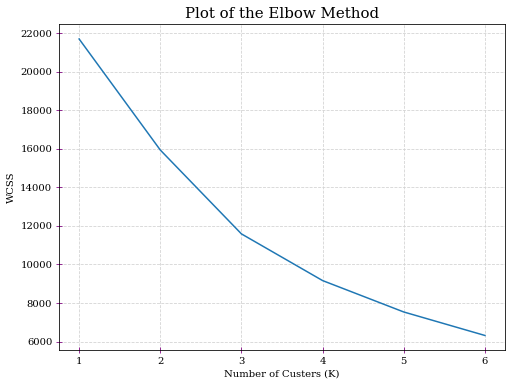

In [33]:
# plotting the results of Elbow

wcss = []

for i in range(1, 7):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 7), wcss)
plt.xticks(range(1, 7), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [34]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

C:\Users\Dhanraj Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [35]:
# check the labels assigned to each data point
print(kmean.labels_)

[0 0 1 ... 0 1 0]


In [36]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    1579
1    1546
3     768
2     447
dtype: int64

In [37]:
# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

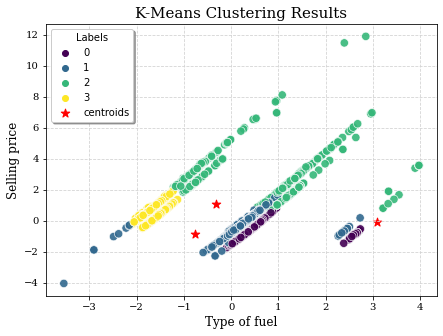

In [46]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC3', y='PC1', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('Type of fuel', family='serif', size=12)
plt.ylabel('Selling price', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()